In [1]:
from pathlib import Path
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import numpy as np

In [2]:
xray_stat_dfs, rmsd_stat_dfs = list(), list()

target = "3ca7"
job_name = "112_synth_2_xray_weights"

xray_dir = Path(Path.home(), "Documents/xray")
log_stats_dir = Path(xray_dir, "sample_bench/data", target)

for i in range(10):
    xray_stat_df = pd.read_csv(Path(log_stats_dir, job_name, "xray_volume_bench_{}.csv".format(i)), index_col=0)
    rmsd_stat_df = pd.read_csv(Path(log_stats_dir, job_name, "rmsd_volume_bench_{}.csv".format(i)), index_col=0)

    xray_stat_dfs.append(xray_stat_df)
    rmsd_stat_dfs.append(rmsd_stat_df)

In [19]:
all_mins, all_maxes = list(), list()
for xray_stat_df in xray_stat_dfs:
    all_mins.append(xray_stat_df["xray_0_mean"].min())
    all_maxes.append(xray_stat_df["xray_0_mean"].max())
print(np.min(all_mins), np.max(all_maxes))

all_mins, all_maxes = list(), list()
for xray_stat_df in xray_stat_dfs:
    all_mins.append(xray_stat_df["rmsd_avg_0_mean"].min())
    all_maxes.append(xray_stat_df["rmsd_avg_0_mean"].max())
print(np.min(all_mins), np.max(all_maxes))

all_mins, all_maxes = list(), list()
for rmsd_stat_df in rmsd_stat_dfs:
    all_mins.append(rmsd_stat_df["rmsd_avg_0_mean"].min())
    all_maxes.append(rmsd_stat_df["rmsd_avg_0_mean"].max())
print(np.min(all_mins), np.max(all_maxes))


1.830959109530342 2.757075115830585
0.0685452856810797 0.5728352110131948
0.0249386802582379 0.4457530781313503


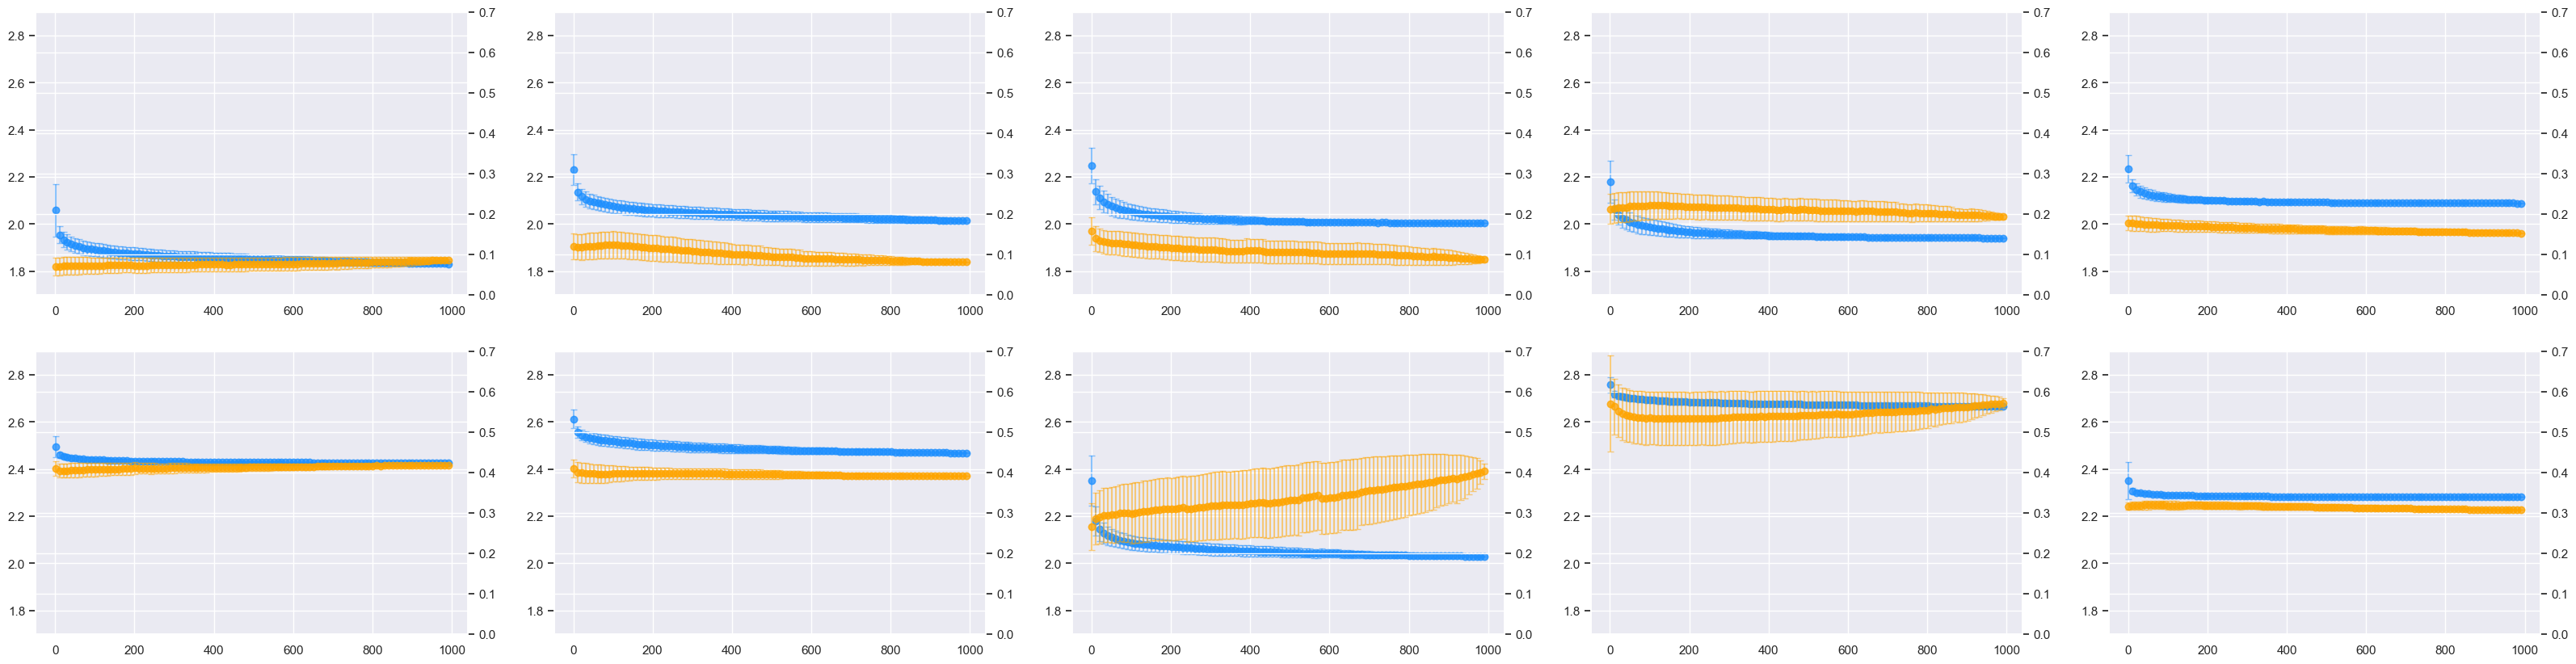

In [22]:
fig, axs = plt.subplots(2, 5, figsize=(40,10))

colors = list()
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

alpha = .5
space = 10

x = xray_stat_df.index[::space]

for i in range(10):
    y1 = xray_stat_dfs[i]["xray_0_mean"][::space]
    std1 = xray_stat_dfs[i]["xray_0_std"][::space]

    y2 = xray_stat_dfs[i]["rmsd_avg_0_mean"][::space]
    std2 = xray_stat_dfs[i]["rmsd_avg_0_std"][::space]

    ax1 = axs[i//5][i%5]
    ax1.set_ylim(1.7, 2.9)
    ax1.scatter(x, y1, c=colors[0], alpha=alpha)
    ax1.errorbar(x, y1, std1, linestyle='None', marker='o', capsize=3, c=colors[0], alpha=alpha)

    ax2 = ax1.twinx()
    ax2.set_ylim(0,.7)
    ax2.scatter(x, y2, c=colors[1], alpha=alpha)
    ax2.errorbar(x, y2, std2, linestyle='None', marker='o', capsize=3, c=colors[1], alpha=alpha)

    # y3 = rmsd_stat_dfs[i]["rmsd_avg_0_mean"][::space]
    # std3 = rmsd_stat_dfs[i]["rmsd_avg_0_std"][::space]

    # ax3 = axs[i//5][i%5]
    # ax3.set_ylim(0,.6)
    # ax3.scatter(x, y3, c=colors[1], alpha=alpha)
    # ax3.errorbar(x, y3, std3, linestyle='None', marker='o', capsize=3, c=colors[1], alpha=alpha)

plt.savefig(Path(Path.home(), "Desktop/sample_volume_benchmark.png"))


